NBA Shot Selection of 2023

With the insurgence of 3-point shots over the past decade due to the rise of superstar Steph Curry, we'd like to take a brief look into the scoring statistics for the past year and break down every field goal taken in the 2022-2023 NBA season

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df=pd.read_csv('shot_data.csv')
sns.set(style='whitegrid')

Let's take a brief look at the data!

In [33]:
df.dtypes

SEASON_1             int64
SEASON_2            object
TEAM_ID              int64
TEAM_NAME           object
PLAYER_ID            int64
PLAYER_NAME         object
POSITION_GROUP      object
POSITION            object
GAME_DATE           object
GAME_ID              int64
HOME_TEAM           object
AWAY_TEAM           object
EVENT_TYPE          object
SHOT_MADE             bool
ACTION_TYPE         object
SHOT_TYPE           object
BASIC_ZONE          object
ZONE_NAME           object
ZONE_ABB            object
ZONE_RANGE          object
LOC_X              float64
LOC_Y              float64
SHOT_DISTANCE        int64
QUARTER              int64
MINS_LEFT            int64
SECS_LEFT            int64
Time Left           object
MADE_SHOT            int32
MADE_3PT             int32
POINTS_PRODUCED      int64
dtype: object

In [14]:
df.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Time Left,MADE_SHOT,MADE_3PT,POINTS_PRODUCED
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,...,23.4,12.95,24,1,11,20,11:20,1,0,0
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,-0.4,31.45,26,1,10,52,10:52,0,0,0
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,...,-1.3,5.25,1,1,10,39,10:39,1,0,0
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,-0.1,7.25,2,1,10,31,10:31,1,0,0
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,...,1.8,7.15,2,1,10,5,10:05,1,0,0


In [3]:
df.dtypes

SEASON_1            int64
SEASON_2           object
TEAM_ID             int64
TEAM_NAME          object
PLAYER_ID           int64
PLAYER_NAME        object
POSITION_GROUP     object
POSITION           object
GAME_DATE          object
GAME_ID             int64
HOME_TEAM          object
AWAY_TEAM          object
EVENT_TYPE         object
SHOT_MADE            bool
ACTION_TYPE        object
SHOT_TYPE          object
BASIC_ZONE         object
ZONE_NAME          object
ZONE_ABB           object
ZONE_RANGE         object
LOC_X             float64
LOC_Y             float64
SHOT_DISTANCE       int64
QUARTER             int64
MINS_LEFT           int64
SECS_LEFT           int64
Time Left          object
dtype: object

Starting at the highest level, let's see where the breakdown of every shot. This lists every field goal taken in 2023.

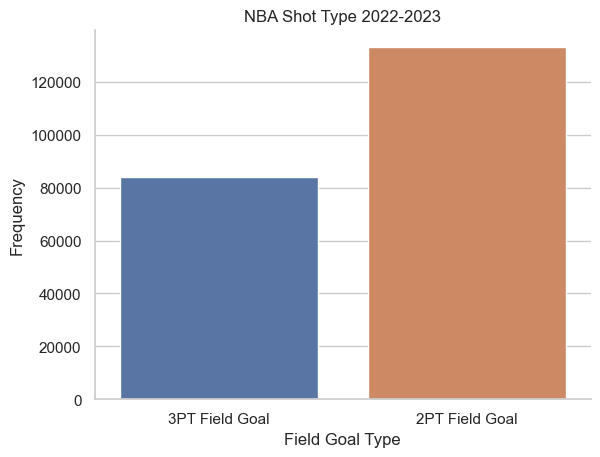

In [4]:
sns.countplot(data=df,
              x='SHOT_TYPE')
plt.xlabel('Field Goal Type')
plt.ylabel('Frequency')
plt.title('NBA Shot Type 2022-2023')
sns.despine()
plt.show()

In [5]:
three_pointers = df[df['SHOT_TYPE'] == "3PT Field Goal"].shape[0]

# Count the total number of shots
total_shots = df.shape[0]

# Calculate the percentage of three-pointers
three_point_percentage = (three_pointers / total_shots) * 100

# Print the result
print(f"Percentage of Three-Pointers: {three_point_percentage:.2f}%")

Percentage of Three-Pointers: 38.75%


That's incredible! One wouldnt't guess how astronomically high the trend of 3-pointers made over the generations has really come. This means more than 1/3rd of all shots taken by an NBA player will be a three-pointer.

The next thing I want to explore is are there any trends on positioning throughout the data that point to where the best three-pointers are taken? Let's twist the data a little bit to narrow down to made shots.

In [17]:
df['MADE_SHOT'] = np.where(df['EVENT_TYPE'] == "Made Shot", 1, 0)
df['MADE_3PT'] = np.where((df['SHOT_TYPE'] == "3PT Field Goal") & (df['EVENT_TYPE'] == "Made Shot"), 1, 0)

In [18]:
total = df['MADE_3PT'].sum()

print(total)

#looking good so far

30359


The following bar chart will explain the field goal % of all the shots made. The results aren't surprising, particularly the backcourt three-point shots being astronomically low!

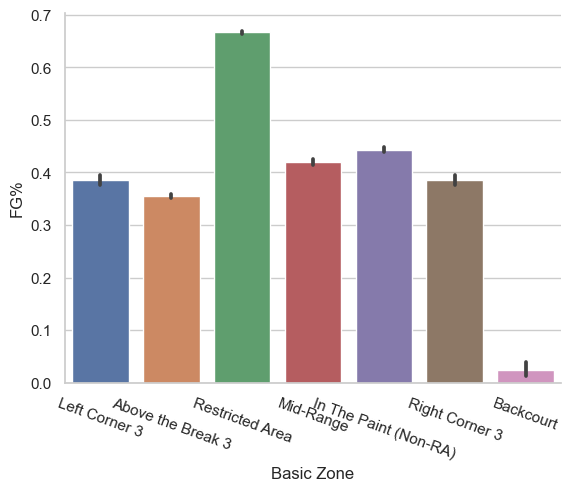

In [30]:
sns.barplot(data=df, x='BASIC_ZONE', y='MADE_SHOT')
plt.xticks(rotation=-20)
plt.xlabel('Basic Zone')
plt.ylabel('FG%')
sns.despine()
plt.show()

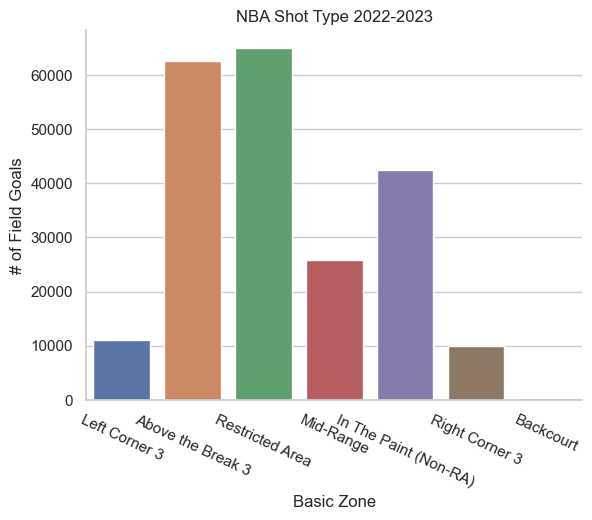

In [37]:
sns.countplot(data=df,
              x='BASIC_ZONE')
plt.xticks(rotation=-25)
plt.xlabel('Basic Zone')
plt.ylabel('# of Field Goals')
plt.title('NBA Shot Type 2022-2023')
sns.despine()
plt.show()

Let's run that again, but we'll subset Three Pointers.

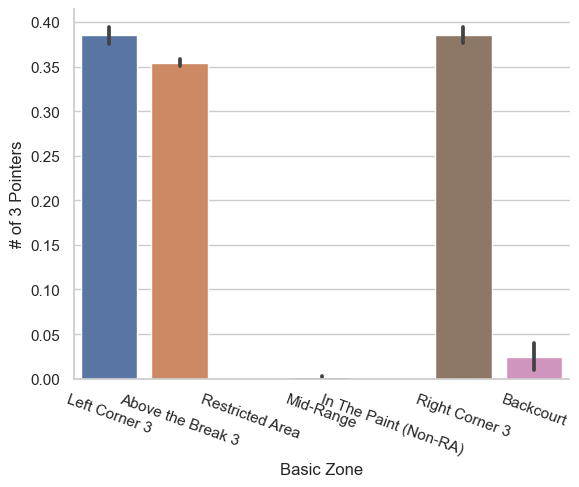

In [31]:
sns.barplot(data=df, x='BASIC_ZONE', y='MADE_3PT')
plt.xticks(rotation=-20)
plt.xlabel('Basic Zone')
plt.ylabel('# of 3 Pointers')
sns.despine()
plt.show()

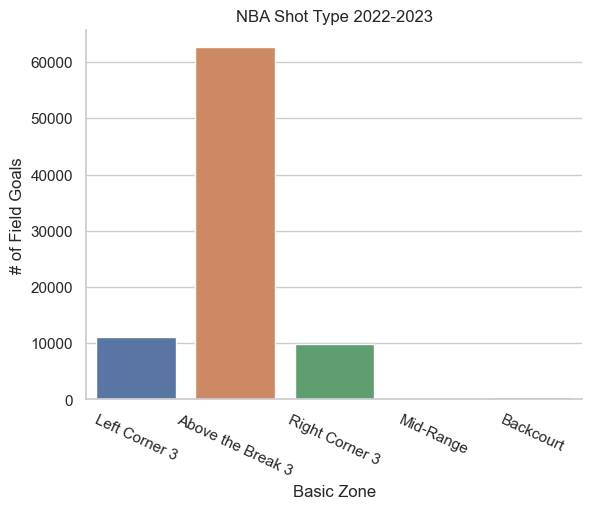

In [39]:
three_pointers = df[df['SHOT_TYPE'] == "3PT Field Goal"]

sns.countplot(data=three_pointers,
              x='BASIC_ZONE')
plt.xticks(rotation=-25)
plt.xlabel('Basic Zone')
plt.ylabel('# of Field Goals')
plt.title('NBA Shot Type 2022-2023')
sns.despine()
plt.show()

Quite intriguing that this accounts for Mid-Range and Backcourt. This presents another layer of the data where a shooter may just have his foot on the line, and it counts as a 2-Pointer.

However, do teams typically take riskier three-pointers later in games? It's the last thing I'd like to look into.



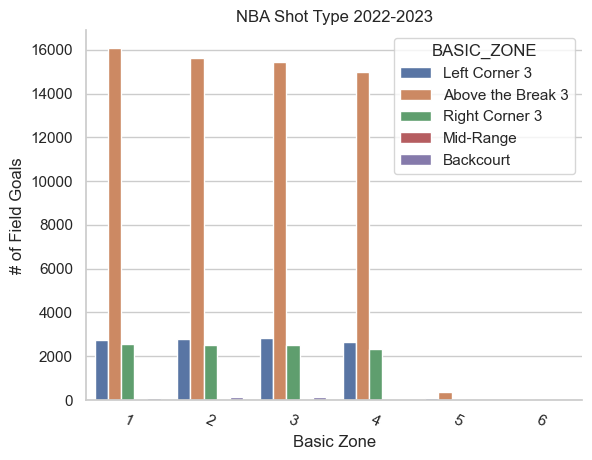

In [42]:
sns.countplot(data=three_pointers, x='QUARTER',
              hue='BASIC_ZONE')
plt.xticks(rotation=-25)
plt.xlabel('Basic Zone')
plt.ylabel('# of Field Goals')
plt.title('NBA Shot Type 2022-2023')
sns.despine()
plt.show()

Not exactly! The same distribution exists across all four quarters, therefore there shouldn't be any real bias here.


By now this gives us a solid understanding of what we're working with. In order to identify a model by player, then this can well establish the foundation we're going for.